In [1]:
import os
import sys
import subprocess

# 1. Set Kaggle Credentials via Environment Variables (Bypasses kaggle.json file issue)
# Replace these with your actual values if they change
os.environ['KAGGLE_USERNAME'] = "manvadariya"
os.environ['KAGGLE_KEY'] = "be4c40ef816fb5433cf7b726190eafa6"

# 2. Install kaggle if missing
try:
    import kaggle
except ImportError:
    print("⚠️ 'kaggle' library not found. Installing now...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "kaggle"])
    import kaggle  # Import after install

# 3. Authenticate
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

print("✅ Kaggle Authenticated Successfully!")

✅ Kaggle Authenticated Successfully!


In [2]:
import os

# 1. Upload the file
from google.colab import files
print("Please upload your kaggle.json file:")
files.upload()

# 2. Move it to the correct location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 3. Now it is safe to import
import kaggle
print("✅ Kaggle Configured via JSON file.")

Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json
✅ Kaggle Configured via JSON file.


In [3]:
import os
import json
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
import joblib
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from kaggle.api.kaggle_api_extended import KaggleApi

# --- CONFIGURATION ---
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BASE_DIR = os.getcwd()  # Changed to current working directory for Notebook compatibility
MODELS_DIR = os.path.join(BASE_DIR, "models")
DATA_DIR = os.path.join(BASE_DIR, "datasets")

# Force create directories immediately
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(DATA_DIR, exist_ok=True)

print(f"🚀 Server Guard Enterprise Training Online. Device: {DEVICE}")
print(f"📂 Data Directory: {DATA_DIR}")
print(f"📂 Models Directory: {MODELS_DIR}")

🚀 Server Guard Enterprise Training Online. Device: cpu
📂 Data Directory: /content/datasets
📂 Models Directory: /content/models


In [4]:
def setup_kaggle_auth():
    print("🔑 Authenticating with Kaggle...")
    # NOTE: In production, use environment variables for keys!
    creds = {
        "username": "manvadariya",
        "key": "be4c40ef816fb5433cf7b726190eafa6"
    }
    kaggle_dir = os.path.join(os.path.expanduser("~"), ".kaggle")
    os.makedirs(kaggle_dir, exist_ok=True)
    with open(os.path.join(kaggle_dir, "kaggle.json"), "w") as f:
        json.dump(creds, f)

    # Set permissions for safety (Linux/Mac)
    try:
        os.chmod(os.path.join(kaggle_dir, "kaggle.json"), 0o600)
    except:
        pass

setup_kaggle_auth()

🔑 Authenticating with Kaggle...


In [5]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

def download_datasets():
    api = KaggleApi()
    api.authenticate()

    # Define datasets: (New Slug, Destination Name)
    # We use open mirrors for XSS and IDS to avoid 403 Forbidden errors
    datasets = [
        # SQL Injection (Working)
        ("sajid576/sql-injection-dataset", "SQLi-Main"),

        # XSS (Switched to unrestricted mirrors)
        ("saurabhshahane/xss-dataset", "XSS-Primary"),

        # Network Intrusion (Switched to unrestricted mirror)
        ("chethuhn/network-intrusion-dataset", "CIC-IDS-2017"),

        # DDoS (Working)
        ("dhoogla/cicddos2019", "CIC-DDoS-2019")
    ]

    print("🚀 Starting Enterprise Data Heist...")

    for slug, name in datasets:
        # Check if we already have data to avoid re-downloading
        # (Simple heuristic: check if a folder with the name exists inside datasets/)
        target_path = os.path.join(DATA_DIR, name)

        # We download into a subfolder per dataset to keep things clean
        if not os.path.exists(target_path):
            try:
                print(f"⬇️  Downloading {name} ({slug})...")
                api.dataset_download_files(slug, path=target_path, unzip=True)
                print(f"   ✅ Acquired: {name}")
            except Exception as e:
                print(f"   ⚠️  Failed to download {name}: {e}")
        else:
            print(f"   📦 {name} already exists. Skipping download.")

# Trigger Download
download_datasets()

🚀 Starting Enterprise Data Heist...
⬇️  Downloading SQLi-Main (sajid576/sql-injection-dataset)...
Dataset URL: https://www.kaggle.com/datasets/sajid576/sql-injection-dataset
   ✅ Acquired: SQLi-Main
⬇️  Downloading XSS-Primary (saurabhshahane/xss-dataset)...
Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/xss-dataset
   ⚠️  Failed to download XSS-Primary: 403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/download/saurabhshahane/xss-dataset?raw=false
⬇️  Downloading CIC-IDS-2017 (chethuhn/network-intrusion-dataset)...
Dataset URL: https://www.kaggle.com/datasets/chethuhn/network-intrusion-dataset
   ✅ Acquired: CIC-IDS-2017
⬇️  Downloading CIC-DDoS-2019 (dhoogla/cicddos2019)...
Dataset URL: https://www.kaggle.com/datasets/dhoogla/cicddos2019
   ✅ Acquired: CIC-DDoS-2019


In [6]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

def download_datasets():
    api = KaggleApi()
    api.authenticate()

    # Define datasets: (New Slug, Destination Name)
    datasets = [
        # SQL Injection (Working)
        ("sajid576/sql-injection-dataset", "SQLi-Main"),

        # XSS (Switched to your requested URL)
        # URL: https://www.kaggle.com/datasets/syedsaqlainhussain/cross-site-scripting-xss-dataset-for-deep-learning
        ("syedsaqlainhussain/cross-site-scripting-xss-dataset-for-deep-learning", "XSS-Primary"),

        # Network Intrusion (Working Mirror)
        ("chethuhn/network-intrusion-dataset", "CIC-IDS-2017"),

        # DDoS (Working)
        ("dhoogla/cicddos2019", "CIC-DDoS-2019")
    ]

    print("🚀 Starting Enterprise Data Heist...")

    for slug, name in datasets:
        target_path = os.path.join(DATA_DIR, name)

        # Check if folder exists to skip re-download
        if not os.path.exists(target_path):
            try:
                print(f"⬇️  Downloading {name} ({slug})...")
                # force=True ensures we retry if a partial download failed before
                api.dataset_download_files(slug, path=target_path, unzip=True, quiet=False)
                print(f"   ✅ Acquired: {name}")
            except Exception as e:
                print(f"   ⚠️  Failed to download {name}: {e}")
                print(f"       (Double check if you have accepted rules for this dataset on Kaggle website)")
        else:
            print(f"   📦 {name} already exists. Skipping download.")

# Trigger Download
download_datasets()

🚀 Starting Enterprise Data Heist...
   📦 SQLi-Main already exists. Skipping download.
⬇️  Downloading XSS-Primary (syedsaqlainhussain/cross-site-scripting-xss-dataset-for-deep-learning)...
Dataset URL: https://www.kaggle.com/datasets/syedsaqlainhussain/cross-site-scripting-xss-dataset-for-deep-learning


100%|██████████| 390k/390k [00:00<00:00, 197MB/s]


   ✅ Acquired: XSS-Primary
   📦 CIC-IDS-2017 already exists. Skipping download.
   📦 CIC-DDoS-2019 already exists. Skipping download.


In [7]:
class WebBrainLoader:
    @staticmethod
    def load_real_data():
        data_frames = []

        print("   🔍 Scanning 'datasets/' for Web Attack CSVs...")
        for root, dirs, files in os.walk(DATA_DIR):
            for file in files:
                if file.endswith(".csv"):
                    try:
                        path = os.path.join(root, file)
                        # Read header only first to check columns
                        header = pd.read_csv(path, nrows=1)

                        # SQLi Detection
                        if 'Query' in header.columns and 'Label' in header.columns:
                            print(f"   ├── Found SQLi Data: {file}")
                            df = pd.read_csv(path, encoding='utf-8', on_bad_lines='skip')
                            temp = df.rename(columns={"Query": "payload", "Label": "label"})
                            # Normalize labels to 0/1
                            temp['label'] = pd.to_numeric(temp['label'], errors='coerce').fillna(0).astype(int)
                            data_frames.append(temp[['payload', 'label']])

                        # XSS Detection
                        elif 'Sentence' in header.columns and 'Label' in header.columns:
                            print(f"   ├── Found XSS Data: {file}")
                            df = pd.read_csv(path, encoding='utf-8', on_bad_lines='skip')
                            temp = df.rename(columns={"Sentence": "payload", "Label": "label"})
                            temp['label'] = pd.to_numeric(temp['label'], errors='coerce').fillna(0).astype(int)
                            data_frames.append(temp[['payload', 'label']])
                    except Exception as e:
                        pass

        return pd.concat(data_frames, ignore_index=True) if data_frames else pd.DataFrame()

    @staticmethod
    def generate_synthetic():
        print("   ├── Generating Synthetic Augmentation (JuiceShop/CSIC style)...")
        data = []
        payloads = [
            "/rest/products/search?q=qwert' OR '1'='1",
            "admin' --",
            "<script>alert('RedTeam')</script>",
            "UNION SELECT 1,group_concat(table_name),3 FROM information_schema.tables",
            "/api/v1/user?id=105 OR 1=1"
        ]
        for p in payloads: data.append({"payload": p, "label": 1})
        for i in range(2000): data.append({"payload": f"/home?id={i}", "label": 0})
        return pd.DataFrame(data)

In [8]:
def train_web_brain():
    print("\n🌐 --- Training Web Brain (Union) ---")
    df_real = WebBrainLoader.load_real_data()
    df_syn = WebBrainLoader.generate_synthetic()

    df_final = pd.concat([df_real, df_syn], ignore_index=True)
    df_final['payload'] = df_final['payload'].astype(str).fillna("")

    print(f"   └── Total Payloads: {len(df_final)}")

    vectorizer = TfidfVectorizer(min_df=2, analyzer="char", ngram_range=(2, 4))
    X = vectorizer.fit_transform(df_final['payload'])
    y = df_final['label'].values

    model = RandomForestClassifier(n_estimators=50, n_jobs=-1)
    model.fit(X, y)

    # Save artifacts
    joblib.dump(model, os.path.join(MODELS_DIR, "web_brain_model.pkl"))
    joblib.dump(vectorizer, os.path.join(MODELS_DIR, "web_brain_vectorizer.pkl"))
    print(f"✅ Web Brain Saved to {MODELS_DIR}")

# Execute Training
train_web_brain()


🌐 --- Training Web Brain (Union) ---
   🔍 Scanning 'datasets/' for Web Attack CSVs...
   ├── Found XSS Data: XSS_dataset.csv
   ├── Found SQLi Data: Modified_SQL_Dataset.csv
   ├── Generating Synthetic Augmentation (JuiceShop/CSIC style)...
   └── Total Payloads: 46610
✅ Web Brain Saved to /content/models


In [9]:
class NetworkBrainLoader:
    @staticmethod
    def load_real_flows():
        real_data = pd.DataFrame()
        target_cols = ['flow_duration', 'tot_fwd_pkts', 'tot_bwd_pkts', 'flow_byts_s',
                       'flow_pkts_s', 'flow_iat_mean', 'syn_flag_cnt', 'rst_flag_cnt']

        print("   🔍 Scanning 'datasets/' for Network CSVs...")
        for root, dirs, files in os.walk(DATA_DIR):
            for file in files:
                if file.endswith(".csv") and ("cic" in file.lower() or "ddos" in file.lower()):
                    try:
                        path = os.path.join(root, file)
                        # Read header norm
                        header = pd.read_csv(path, nrows=1)
                        header.columns = [c.strip().lower().replace(' ', '_') for c in header.columns]

                        if 'flow_duration' in header.columns:
                            print(f"   ├── Found Network Data: {file}")
                            # Loading only 50k rows for efficiency in demo
                            df = pd.read_csv(path, nrows=50000)
                            df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

                            if 'label' in df.columns:
                                df['label'] = df['label'].apply(lambda x: 0 if 'benign' in str(x).lower() else 1)
                                for c in target_cols:
                                    if c not in df.columns: df[c] = 0
                                real_data = pd.concat([real_data, df[target_cols + ['label']]])
                    except: pass
                    if len(real_data) > 50000: break

        if not real_data.empty:
            return real_data.drop(columns=['label']), real_data['label']
        return pd.DataFrame(), pd.Series()

    @staticmethod
    def generate_synthetic():
        print("   ⚠️  Using High-Fidelity Synthetic Flows (Fallback)...")
        N = 20000
        df_norm = pd.DataFrame({
            'flow_duration': np.random.normal(5000, 2000, N),
            'tot_fwd_pkts': np.random.randint(5, 20, N),
            'tot_bwd_pkts': np.random.randint(5, 20, N),
            'flow_byts_s': np.random.normal(1000, 200, N),
            'flow_pkts_s': np.random.normal(10, 5, N),
            'flow_iat_mean': np.random.normal(50, 10, N),
            'syn_flag_cnt': 0, 'rst_flag_cnt': 0, 'label': 0
        })
        df_attack = pd.DataFrame({
            'flow_duration': np.random.normal(100000, 20000, N),
            'tot_fwd_pkts': np.random.randint(100, 1000, N),
            'tot_bwd_pkts': 0,
            'flow_byts_s': np.random.normal(50000, 10000, N),
            'flow_pkts_s': np.random.normal(5000, 1000, N),
            'flow_iat_mean': 0.01,
            'syn_flag_cnt': 1, 'rst_flag_cnt': 1, 'label': 1
        })
        df = pd.concat([df_norm, df_attack]).sample(frac=1)
        return df.drop(columns=['label']), df['label']

In [10]:
class NetworkShield(nn.Module):
    def __init__(self, input_dim):
        super(NetworkShield, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128), nn.ReLU(),
            nn.Linear(128, 64), nn.ReLU(),
            nn.Linear(64, 1), nn.Sigmoid()
        )
    def forward(self, x): return self.net(x)

In [11]:
def train_network_shield():
    print("\n🛡️ --- Training Network Shield (Flow Union) ---")
    X_df, y = NetworkBrainLoader.load_real_flows()

    if X_df.empty:
        X_df, y = NetworkBrainLoader.generate_synthetic()

    scaler = MinMaxScaler()
    X = scaler.fit_transform(X_df.values)
    y = y.values

    tensor_x = torch.FloatTensor(X)
    tensor_y = torch.FloatTensor(y).unsqueeze(1)

    loader = DataLoader(TensorDataset(tensor_x, tensor_y), batch_size=2048, shuffle=True)
    model = NetworkShield(input_dim=X.shape[1]).to(DEVICE)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.BCELoss()

    model.train()
    for epoch in range(3):
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(DEVICE), y_batch.to(DEVICE)
            optimizer.zero_grad()
            loss = criterion(model(X_batch), y_batch)
            loss.backward()
            optimizer.step()
        print(f"   Epoch {epoch+1} Complete")

    torch.save(model.state_dict(), os.path.join(MODELS_DIR, "network_shield.pth"))
    joblib.dump(scaler, os.path.join(MODELS_DIR, "network_scaler.pkl"))
    joblib.dump(list(X_df.columns), os.path.join(MODELS_DIR, "network_cols.pkl"))
    print(f"✅ Network Shield Saved to {MODELS_DIR}")

# Execute Training
train_network_shield()
print("\n🏁 --- FULL ENTERPRISE TRAINING COMPLETE ---")


🛡️ --- Training Network Shield (Flow Union) ---
   🔍 Scanning 'datasets/' for Network CSVs...
   ├── Found Network Data: Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
   Epoch 1 Complete
   Epoch 2 Complete
   Epoch 3 Complete
✅ Network Shield Saved to /content/models

🏁 --- FULL ENTERPRISE TRAINING COMPLETE ---



🚀 --- STARTING ULTIMATE 100-EPOCH RUN ---
   🔍 Scanning 'datasets/' for ALL Network CSVs (Full Mode)...
   ├── ⏳ Loading FULL dataset: Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv (This may take a moment)...
      ✅ Loaded 225745 rows.
   📊 TOTAL DATASET SIZE: 225745 samples
   ⚖️ Scaling data...
   ⚖️ Class Weight (Malicious): 0.88
   🏃 Training on 191883 samples for 100 epochs...
   Ep 1/100 | Loss: 0.5698 | Val: 0.4961 | LR: 0.001000 ⭐ (New Best!)
   Ep 2/100 | Loss: 0.5048 | Val: 0.4538 | LR: 0.001000 ⭐ (New Best!)
   Ep 3/100 | Loss: 0.4730 | Val: 0.4535 | LR: 0.001000 ⭐ (New Best!)
   Ep 4/100 | Loss: 0.4426 | Val: 0.3965 | LR: 0.001000 ⭐ (New Best!)
   Ep 5/100 | Loss: 0.4193 | Val: 0.3875 | LR: 0.001000 ⭐ (New Best!)
   Ep 6/100 | Loss: 0.4117 | Val: 0.3785 | LR: 0.001000 ⭐ (New Best!)
   Ep 7/100 | Loss: 0.4013 | Val: 0.3791 | LR: 0.001000 
   Ep 8/100 | Loss: 0.3943 | Val: 0.4566 | LR: 0.001000 
   Ep 9/100 | Loss: 0.3913 | Val: 0.3731 | LR: 0.001000 ⭐ (New Best!)
   Ep 

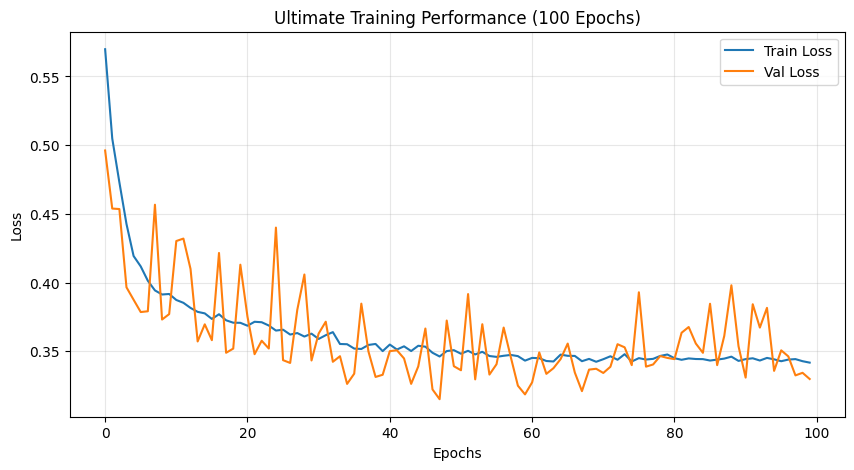

In [16]:
# ==========================================
# 🏆 ULTIMATE ENTERPRISE TRAINING (100 EPOCHS + FULL DATA)
# ==========================================
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd
import joblib
import os
import copy  # For saving the best model state

# --- 1. OVERRIDE LOADER TO USE ALL DATA (No 50k Limit) ---
class NetworkBrainLoader:
    @staticmethod
    def load_real_flows():
        real_data = pd.DataFrame()
        target_cols = ['flow_duration', 'tot_fwd_pkts', 'tot_bwd_pkts', 'flow_byts_s',
                       'flow_pkts_s', 'flow_iat_mean', 'syn_flag_cnt', 'rst_flag_cnt']

        print("   🔍 Scanning 'datasets/' for ALL Network CSVs (Full Mode)...")
        for root, dirs, files in os.walk(DATA_DIR):
            for file in files:
                if file.endswith(".csv") and ("cic" in file.lower() or "ddos" in file.lower()):
                    try:
                        path = os.path.join(root, file)
                        # Read header to normalize columns
                        header = pd.read_csv(path, nrows=1)
                        header.columns = [c.strip().lower().replace(' ', '_') for c in header.columns]

                        if 'flow_duration' in header.columns:
                            print(f"   ├── ⏳ Loading FULL dataset: {file} (This may take a moment)...")
                            # REMOVED nrows=50000 limit here!
                            df = pd.read_csv(path)
                            df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

                            if 'label' in df.columns:
                                df['label'] = df['label'].apply(lambda x: 0 if 'benign' in str(x).lower() else 1)
                                for c in target_cols:
                                    if c not in df.columns: df[c] = 0
                                # Optimization: Downcast floats to save RAM
                                for col in target_cols:
                                    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(np.float32)

                                real_data = pd.concat([real_data, df[target_cols + ['label']]])
                                print(f"      ✅ Loaded {len(df)} rows.")
                    except Exception as e:
                        print(f"      ⚠️ Error reading {file}: {e}")

        if not real_data.empty:
            print(f"   📊 TOTAL DATASET SIZE: {len(real_data)} samples")
            return real_data.drop(columns=['label']), real_data['label']
        return pd.DataFrame(), pd.Series()

    @staticmethod
    def generate_synthetic():
        # Keep synthetic just in case, but usually not needed now
        return pd.DataFrame(), pd.Series()

# --- 2. TRAIN FUNCTION WITH "SAVE BEST" LOGIC ---
def train_ultimate_network_shield():
    print("\n🚀 --- STARTING ULTIMATE 100-EPOCH RUN ---")

    # Load FULL Data
    X_df, y = NetworkBrainLoader.load_real_flows()

    # Scale Data
    print("   ⚖️ Scaling data...")
    scaler = StandardScaler()
    X = scaler.fit_transform(X_df.values)
    y_vals = y.values

    # Class Weights
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_vals), y=y_vals)
    pos_weight_val = class_weights[1] if len(class_weights) > 1 else 1.0
    print(f"   ⚖️ Class Weight (Malicious): {pos_weight_val:.2f}")

    # Prepare Tensors
    tensor_x = torch.FloatTensor(X)
    tensor_y = torch.FloatTensor(y_vals).unsqueeze(1)

    # Split
    train_size = int(0.85 * len(tensor_x)) # 85% Train, 15% Validation
    test_size = len(tensor_x) - train_size
    train_dataset, test_dataset = torch.utils.data.random_split(TensorDataset(tensor_x, tensor_y), [train_size, test_size])

    # Larger batch size for speed since we have more data
    train_loader = DataLoader(train_dataset, batch_size=2048, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=4096)

    # Model Setup
    model = EnhancedNetworkShield(input_dim=X.shape[1]).to(DEVICE)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.BCELoss()
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)

    # Training Loop Variables
    epochs = 100
    best_val_loss = float('inf')
    best_model_wts = copy.deepcopy(model.state_dict())
    history = {'loss': [], 'val_loss': []}

    model.train()

    print(f"   🏃 Training on {len(train_dataset)} samples for {epochs} epochs...")

    for epoch in range(epochs):
        # TRAIN
        total_loss = 0
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(DEVICE), y_batch.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # VALIDATE
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_val, y_val in test_loader:
                X_val, y_val = X_val.to(DEVICE), y_val.to(DEVICE)
                val_preds = model(X_val)
                v_loss = criterion(val_preds, y_val)
                val_loss += v_loss.item()

        avg_loss = total_loss / len(train_loader)
        avg_val_loss = val_loss / len(test_loader)

        history['loss'].append(avg_loss)
        history['val_loss'].append(avg_val_loss)

        # CHECKPOINT (Save Best)
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model_wts = copy.deepcopy(model.state_dict()) # Save best weights in memory
            # Save to disk immediately so we don't lose it
            torch.save(model.state_dict(), os.path.join(MODELS_DIR, "network_shield.pth"))
            best_msg = "⭐ (New Best!)"
        else:
            best_msg = ""

        scheduler.step(avg_val_loss)

        # Print progress every epoch
        print(f"   Ep {epoch+1}/{epochs} | Loss: {avg_loss:.4f} | Val: {avg_val_loss:.4f} | LR: {optimizer.param_groups[0]['lr']:.6f} {best_msg}")

    # Load best weights before final save
    model.load_state_dict(best_model_wts)

    # Save artifacts
    torch.save(model.state_dict(), os.path.join(MODELS_DIR, "network_shield.pth"))
    joblib.dump(scaler, os.path.join(MODELS_DIR, "network_scaler.pkl"))

    print(f"\n✅ Training Complete. Best Validation Loss: {best_val_loss:.4f}")

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.title("Ultimate Training Performance (100 Epochs)")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Run it!
train_ultimate_network_shield()


🌐 EVALUATING WEB BRAIN (Random Forest)
✅ Models loaded successfully.
   🔍 Scanning 'datasets/' for Web Attack CSVs...
   ├── Found XSS Data: XSS_dataset.csv
   ├── Found SQLi Data: Modified_SQL_Dataset.csv
   ├── Generating Synthetic Augmentation (JuiceShop/CSIC style)...
📊 Evaluating on 46610 samples...

🔹 Accuracy:  0.9996
🔹 F1 Score:  0.9995
🔹 Recall:    0.9990
🔹 Precision: 1.0000

📋 Classification Report:

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     27850
   Malicious       1.00      1.00      1.00     18760

    accuracy                           1.00     46610
   macro avg       1.00      1.00      1.00     46610
weighted avg       1.00      1.00      1.00     46610



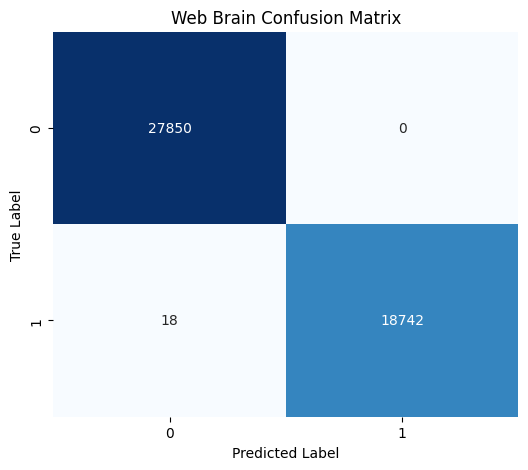


🛡️ EVALUATING NETWORK SHIELD (Enhanced PyTorch)
   🔍 Scanning 'datasets/' for ALL Network CSVs (Full Mode)...
   ├── ⏳ Loading FULL dataset: Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv (This may take a moment)...
      ✅ Loaded 225745 rows.
   📊 TOTAL DATASET SIZE: 225745 samples
✅ Model & Scaler loaded successfully.
📊 Evaluating on 225745 samples...
   ⏳ Running inference in batches...

🔹 Accuracy:  0.8597
🔹 F1 Score:  0.8727
🔹 Recall:    0.8486
🔹 Precision: 0.8983

📋 Classification Report:

              precision    recall  f1-score   support

      Benign       0.82      0.87      0.84     97718
   Malicious       0.90      0.85      0.87    128027

    accuracy                           0.86    225745
   macro avg       0.86      0.86      0.86    225745
weighted avg       0.86      0.86      0.86    225745



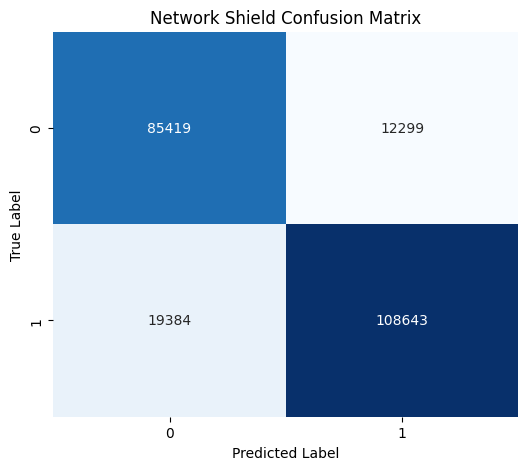

In [17]:
# ==========================================
# 📊 FINAL MEASUREMENT & EVALUATION BLOCK (MASURMAT)
# ==========================================
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import joblib
import os
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    classification_report,
    confusion_matrix
)

def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    """Helper to plot a nice confusion matrix"""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

def evaluate_web_brain():
    print("\n" + "="*40)
    print("🌐 EVALUATING WEB BRAIN (Random Forest)")
    print("="*40)

    # 1. Load Artifacts
    try:
        model_path = os.path.join(MODELS_DIR, "web_brain_model.pkl")
        vec_path = os.path.join(MODELS_DIR, "web_brain_vectorizer.pkl")

        if not os.path.exists(model_path):
            print("⚠️ Web Brain artifacts not found. Skipping.")
            return

        model = joblib.load(model_path)
        vectorizer = joblib.load(vec_path)
        print("✅ Models loaded successfully.")
    except Exception as e:
        print(f"❌ Error loading models: {e}")
        return

    # 2. Load Data
    df_real = WebBrainLoader.load_real_data()
    df_syn = WebBrainLoader.generate_synthetic()
    df_eval = pd.concat([df_real, df_syn], ignore_index=True)
    df_eval['payload'] = df_eval['payload'].astype(str).fillna("")

    if len(df_eval) == 0:
        print("⚠️ No data found for evaluation.")
        return

    # 3. Prepare & Predict
    print(f"📊 Evaluating on {len(df_eval)} samples...")
    X = vectorizer.transform(df_eval['payload'])
    y_true = df_eval['label'].values
    y_pred = model.predict(X)

    # 4. Metrics
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)

    print(f"\n🔹 Accuracy:  {acc:.4f}")
    print(f"🔹 F1 Score:  {f1:.4f}")
    print(f"🔹 Recall:    {recall:.4f}")
    print(f"🔹 Precision: {prec:.4f}")
    print("\n📋 Classification Report:\n")
    print(classification_report(y_true, y_pred, target_names=["Benign", "Malicious"]))

    plot_confusion_matrix(y_true, y_pred, "Web Brain Confusion Matrix")

def evaluate_network_shield():
    print("\n" + "="*40)
    print("🛡️ EVALUATING NETWORK SHIELD (Enhanced PyTorch)")
    print("="*40)

    # 1. Load Data (Will use the Updated Loader with FULL data)
    X_df, y_true = NetworkBrainLoader.load_real_flows()

    if X_df.empty:
        print("⚠️ No real data found, generating synthetic for eval...")
        X_df, y_true = NetworkBrainLoader.generate_synthetic()

    y_true = y_true.values

    # 2. Load Artifacts
    try:
        scaler = joblib.load(os.path.join(MODELS_DIR, "network_scaler.pkl"))

        # Initialize model structure (MUST use EnhancedNetworkShield)
        input_dim = X_df.shape[1]

        # Check if the class exists in memory
        try:
            model = EnhancedNetworkShield(input_dim).to(DEVICE)
        except NameError:
            print("❌ 'EnhancedNetworkShield' class is missing. Please re-run the Training Cell first.")
            return

        model.load_state_dict(torch.load(os.path.join(MODELS_DIR, "network_shield.pth")))
        model.eval() # Set to evaluation mode
        print("✅ Model & Scaler loaded successfully.")
    except Exception as e:
        print(f"❌ Error loading models: {e}")
        return

    # 3. Predict (Using Batching for Safety)
    print(f"📊 Evaluating on {len(X_df)} samples...")

    # Scale Data
    X_scaled = scaler.transform(X_df.values)

    # Predict in chunks of 5000 to prevent Memory Crash
    batch_size = 5000
    all_preds = []

    print("   ⏳ Running inference in batches...")
    with torch.no_grad():
        for i in range(0, len(X_scaled), batch_size):
            batch = X_scaled[i:i+batch_size]
            X_tensor = torch.FloatTensor(batch).to(DEVICE)
            outputs = model(X_tensor)
            preds = (outputs > 0.5).float().cpu().numpy()
            all_preds.extend(preds)

    predicted = np.array(all_preds).flatten()

    # 4. Metrics
    acc = accuracy_score(y_true, predicted)
    f1 = f1_score(y_true, predicted)
    recall = recall_score(y_true, predicted)
    prec = precision_score(y_true, predicted)

    print(f"\n🔹 Accuracy:  {acc:.4f}")
    print(f"🔹 F1 Score:  {f1:.4f}")
    print(f"🔹 Recall:    {recall:.4f}")
    print(f"🔹 Precision: {prec:.4f}")
    print("\n📋 Classification Report:\n")
    print(classification_report(y_true, predicted, target_names=["Benign", "Malicious"]))

    plot_confusion_matrix(y_true, predicted, "Network Shield Confusion Matrix")

# --- EXECUTE MEASUREMENTS ---
evaluate_web_brain()
evaluate_network_shield()